# This script contains:
1. Import Libraries and Dataset
2. Question 2
3. Question 3
4. Question 4
5. Question 5

# 1. Import Libraries and Dataset

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Defining Path
path= r'/Users/navneetjha/Desktop/Career foundry Docs/exercises/Data Immersion /Achievement 4/INSTACART BASKET ANALYSIS JULY14-2024'

In [6]:
path

'/Users/navneetjha/Desktop/Career foundry Docs/exercises/Data Immersion /Achievement 4/INSTACART BASKET ANALYSIS JULY14-2024'

In [8]:
# Import Dataset
df=pd.read_pickle(os.path.join(path,'02 DATA', 'PREPARED DATA','customer_order_product_allclean_mergedfile.pkl'))

# 2. Question 2

In [11]:
# Printing shape of dataset
df.shape

(32434212, 31)

In [13]:
# Printing first few rows to identify PII data
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,order_frequency,first name,surname,gender,state,age,date_joined,number_of_dependents,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


The dataset contains first name, surname, gender, state (demography), age, marital status and no. of dependents of customers. These information fall in the category of Personal Identifiable Identity. When these columns are individually looked it won't be easy to identify a particular person. However, when all the PII columns are put together, one might be able to find the exact customer's information or atleast narrow down the search to tens. Therefore, it is very important to safeguard these information at a very secure database and put measures or give access to only the required person that needs to work with the data and make sure the person is highly skilled and professional at his/her work. 

# 3. Question 3

In [17]:
# Defining regions according to their states
northeast_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south_states = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west_states = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [19]:
# Creating region column 
df.loc[df['state'].isin(northeast_states), 'region'] = 'Northeast'
df.loc[df['state'].isin(midwest_states), 'region'] = 'Midwest'
df.loc[df['state'].isin(south_states), 'region'] = 'South'
df.loc[df['state'].isin(west_states), 'region'] = 'West'

In [20]:
#Calling Head function to see the region column
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,first name,surname,gender,state,age,date_joined,number_of_dependents,marital_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest


In [23]:
# Checking value_count of region column
df['region'].value_counts()

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

The result shows that instacart has highest number of customers in the southern states of the US, followed by western, midwest and then lastly the northeast states. This means that southern states like to shopping more through online platform incomparision to states in the other region. 

# Question 4

In [29]:
df.shape

(32434212, 32)

In [31]:
# Creating activity column 
df.loc[df['order_number']<5, 'high/low_activity'] = 'low-activity'
df.loc[df['order_number']>=5, 'high/low_activity'] = 'high-activity'

In [33]:
# Checking shape of dataset after creating activity column 
df.shape

(32434212, 33)

In [35]:
# Checking value_count of 'high/low_activity' column
df['high/low_activity'].value_counts()

high/low_activity
high-activity    24436791
low-activity      7997421
Name: count, dtype: int64

There are 7997421 low-activity customers.

In [38]:
# Dropping 'low-activity' customers
df_2=df[df['high/low_activity']!='low-activity']

In [39]:
df_2.shape

(24436791, 33)

The results show it only contains the number of rows that equals to the number of high-activity customers. This confirms all low-activity customers details are dropped. 

In [43]:
# Exporting the data
df_2.to_pickle(os.path.join(path,'02 DATA','PREPARED DATA','highactivity_customer_order_product_allclean.pkl'))

# Question 5 creating customer profile

# I. Customer Profiling based on age

In [47]:
#Creating age-group
df_2.loc[df_2['age']<=25, 'age_group']='young_adult'
df_2.loc[(df_2['age']>25) &(df_2['age']<=65), 'age_group']= 'adult'
df_2.loc[df_2['age']>65, 'age_group']='senior'

/var/folders/38/3t8_0dvn1h950p6h5yqb56rm0000gn/T/ipykernel_3788/1006854296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['age']<=25, 'age_group']='young_adult'


In [49]:
df_2['age_group'].value_counts(dropna = False)

age_group
adult          15288778
senior          6097444
young_adult     3050569
Name: count, dtype: int64

In [51]:
df_2.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,gender,state,age,date_joined,number_of_dependents,marital_status,income,region,high/low_activity,age_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high-activity,senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high-activity,senior
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Female,Hawaii,51,1/4/2019,2,married,57797,West,high-activity,adult
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,...,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,South,high-activity,adult
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,...,Male,Oregon,72,3/30/2018,1,married,153843,West,high-activity,senior


In [53]:
# Aggregating for usage frequency by order_dow
df_2.groupby('age_group').agg({'order_dow': ['mean', 'min', 'max']})

order_dow        
                 mean min max
age_group                    
adult        2.743456   0   6
senior       2.757390   0   6
young_adult  2.751083   0   6

In [55]:
# Aggregating for usage frequency by days_since_prior_order
df_2.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
adult                    10.090116  0.0  30.0
senior                   10.079791  0.0  30.0
young_adult              10.072322  0.0  30.0

In [56]:
# Aggregating for age-based expenditure 
df_2.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
adult        11.800160  1.0  99999.0
senior       11.673127  1.0  99999.0
young_adult  12.288692  1.0  99999.0

In [59]:
#Dropping outliers identified in Task 4.9
df_2.loc[df_2['prices'] >100, 'prices'] = np.nan

In [61]:
df_2.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
adult        7.795363  1.0  25.0
senior       7.798122  1.0  25.0
young_adult  7.789767  1.0  25.0

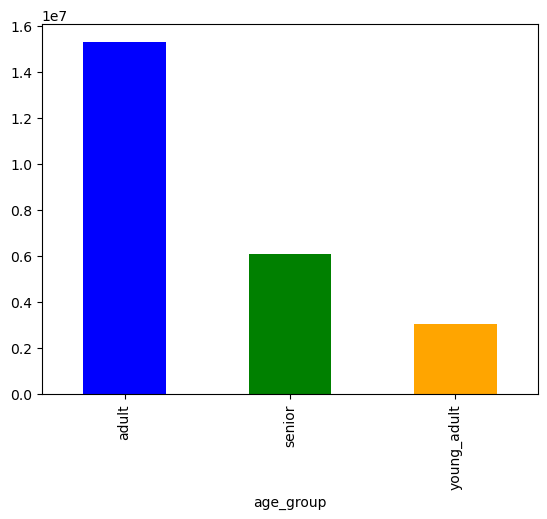

In [62]:
# Create bar chart for age groups
bar=df_2['age_group'].value_counts().plot.bar(color =['blue', 'green','orange'])

In [65]:
# Export bar chart
bar.figure.savefig(os.path.join(path,'04 ANALYSIS','VISUALIZATIONS','age_group_frequency.png'))

# II.Customer profiling based on income

In [68]:
# Creating income_group column
df_2.loc[df_2['income']<=50000, 'income_group']='low'
df_2.loc[(df_2['income']>50000) &(df_2['income']<=100000), 'income_group']='low-middle'
df_2.loc[(df_2['income']>100000) &(df_2['income']<=250000), 'income_group']='upper-middle'
df_2.loc[df_2['income']>250000, 'income_group']='high'

/var/folders/38/3t8_0dvn1h950p6h5yqb56rm0000gn/T/ipykernel_3788/1250090262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['income']<=50000, 'income_group']='low'


In [70]:
# Checking value_counts of the new column
df_2['income_group'].value_counts(dropna=False)

income_group
upper-middle    11085899
low-middle      10605133
low              2596670
high              149089
Name: count, dtype: int64

In [72]:
#Using aggregation for usage frequencies
df_2.groupby('income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
income_group                                  
high                       9.617738  0.0  30.0
low                       10.391198  0.0  30.0
low-middle                10.041682  0.0  30.0
upper-middle              10.061704  0.0  30.0

In [74]:
#Using aggregation for expenditure
df_2.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                  mean  min   max
income_group                     
high          7.774220  1.0  25.0
low           6.719240  1.0  25.0
low-middle    7.891558  1.0  25.0
upper-middle  7.955694  1.0  25.0

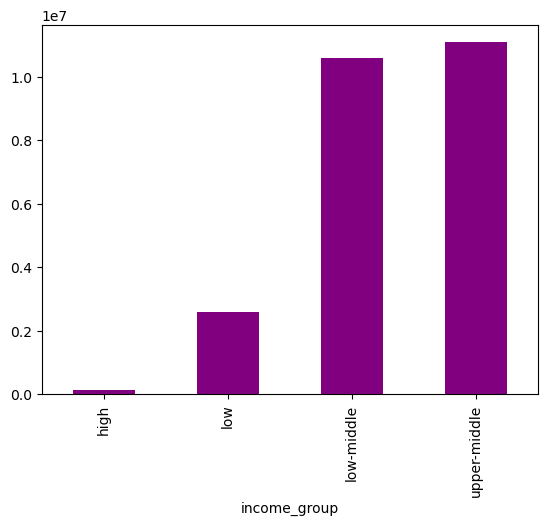

In [76]:
#Bar chart for income_group visualization
income_group_barchart = df_2['income_group'].value_counts().sort_values().plot.bar(color='purple')

In [78]:
## Export bar chart
income_group_barchart.figure.savefig(os.path.join(path,'04 ANALYSIS','VISUALIZATIONS','income_group_frequency.png'))

# III. Customer profiling based on number_of_dependents

In [163]:
# Creating dependents_group column
df_2.loc[df_2['number_of_dependents']==0, 'dependents_group']='single_adult'
df_2.loc[(df_2['number_of_dependents']==1)|(df_2['number_of_dependents']==2), 'dependents_group']='young_parent'
df_2.loc[df_2['number_of_dependents']==3, 'dependents_group']='old_parent'

In [165]:
#checking value_count of dependent_group
df_2['dependents_group'].value_counts()

dependents_group
young_parent    12187117
old_parent       6138887
single_adult     6110787
Name: count, dtype: int64

In [167]:
#Using aggregation for usage frequencies
df_2.groupby('dependents_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
dependents_group                                  
old_parent                    10.098876  0.0  30.0
single_adult                  10.063330  0.0  30.0
young_parent                  10.089515  0.0  30.0

In [169]:
#Using aggregation for expenditure
df_2.groupby('dependents_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
dependents_group                     
old_parent        7.798082  1.0  25.0
single_adult      7.795911  1.0  25.0
young_parent      7.793699  1.0  25.0

In [170]:
dependents_group_counts=df_2['dependents_group'].value_counts()

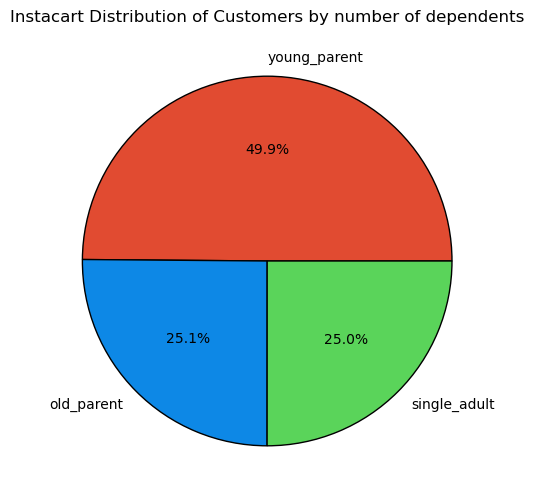

In [173]:
#Creating pie_chart for visualization

plt.figure(figsize=(6, 6))           # Control size of chart
plt.pie(dependents_group_counts, 
        labels = dependents_group_counts.index, 
        autopct='%.1f%%',            # Show percentage to one decimal point
        colors = ['#e14b31', '#0d88e6', '#5ad45a'],   # Set colors using color palette
        wedgeprops = {'edgecolor' : 'black'})       # Set color of boarders
plt.title('Instacart Distribution of Customers by number of dependents')      # Set title of pie chart
plt.show()

In [175]:
# Exporting the pie chart
plt.savefig(os.path.join(path,'04 ANALYSIS','VISUALIZATIONS','dependents_frequency.png'))

<Figure size 640x480 with 0 Axes>

In [179]:
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,age,date_joined,number_of_dependents,marital_status,income,region,high/low_activity,age_group,income_group,dependents_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,81,8/1/2019,1,married,49620,Midwest,high-activity,senior,low,young_parent
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,81,8/1/2019,1,married,49620,Midwest,high-activity,senior,low,young_parent
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,51,1/4/2019,2,married,57797,West,high-activity,adult,low-middle,young_parent
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,...,65,7/25/2019,0,divorced/widowed,44856,South,high-activity,adult,low,single_adult
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,...,72,3/30/2018,1,married,153843,West,high-activity,senior,upper-middle,young_parent


In [181]:
#Export df_2 file into pickle format
df_2.to_pickle(os.path.join(path,'02 DATA','PREPARED DATA','All_variables_customer_order_productcleaned.pkl'))

Further analysis is in script Task 4.10 II